# Volatilidade

A volatilidade é uma métrica de risco que indica a dispersão dos retornos apresentados por uma série histórica de preços. Esta medida influencia em diversas métricas de performance comumente utilizadas no mercado, até por uma questão de o investidor sempre estar buscando o maior retorno **com o menor risco** possíveis (uma combinação risco x retorno que atenda ao seu perfil).

Desta forma, precisamos ter uma forma eficiente de mensurar a volatilidade de uma carteira ou de um ativo. Além disto, a maioria dos modelos comumente utilizados para simular e/ou precificar ativos financeiros tem como *input* a volatilidade daquele ativo. Desta forma, precisamos ter uma medição correta desta métrica, para que os modelos sejam capazes de representar bem a realidade e o risco daquele ativo financeiro.

## Objetivos

- Entender o impacto da volatilidade nos modelos já vistos durante o curso;
- Entender a importância de se estimar corretamente a volatilidade de um ativo/carteira;
- Entender as diferentes formas de se estimar a volatilidade;
- Entender corretamente onde/como se aplicam cada uma das formas de se estimar volatilidade que serão apresentadas nesta aula.

## Modelos de Volatilidade

Existem diversos modelos para se calcular/estimar a volatilidade de detrminado ativo. A seguir vamos apresentar três formas diferentes para se fazer esta estimação. Cada uma das formas apresentadas representa uma **família de modelos**, que não serão todos vistos aqui, porém com os exemplos que serão apresentados de cada uma das famílias, podemos entender o que significa aquela classe de estimações.

### Volatilidade Histórica

A Volatilidade histórica simples é uma forma fácil de se obter uma estimativa de volatilidade. Nela, utiliza-se do desvio padrão de retornos de períodos determinados. 

Por exemplo, pode-se utilizar retornos diários ou mensais para se obter a volatilidade anual.

Dada uma lista com os $n$ preços históricos de um ativo, $X$, vamos chamar de $x_i$ o preço de cada dia.

Calculamos a série de log retornos:

$$u_i = ln(\frac{x_i}{x_{i-1}})$$

Agora com a série $U$ de log retornos, vamos calcular seu desvio padrão:

$$\sigma^{2} = \frac{1}{n-1} \sum_{i=1}^{n} (u_i - \bar{u})^2$$

Sendo $\sigma$ a volatilidade diária do nosso ativo. Podemos multiplicar por $ \sqrt{252}$ para obter a volatilidade anual.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

pd.options.display.float_format = '{:20,.10f}'.format

In [46]:
#primeiro vamos coletar alguns dados

stocks = yf.Ticker("MGLU3.SA")
hist = stocks.history(period="12mo")

In [47]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-03-08,24.6721074463,24.7520493932,23.0832595825,23.0832595825,82907400,0.0000000000,0
2021-03-09,23.5329326787,23.9526283832,23.2931068342,23.3730487823,73816700,0.0000000000,0
2021-03-10,23.7327898168,25.0718189527,23.4529920297,24.8819561005,41874800,0.0000000000,0
2021-03-11,25.0518330032,25.0618259856,24.4422744229,24.7820281982,30648100,0.0000000000,0
2021-03-12,24.5821735414,24.8819553786,24.2524127582,24.5521945953,24567300,0.0000000000,0
...,...,...,...,...,...,...,...
2022-02-25,6.1900000572,6.2699999809,5.8600001335,6.0100002289,133697800,0.0000000000,0
2022-03-02,5.9499998093,6.3400001526,5.9400000572,6.3099999428,101490000,0.0000000000,0
2022-03-03,6.3299999237,6.4800000191,6.1500000954,6.3099999428,102314000,0.0000000000,0


In [48]:
#preparar
df = hist[['Close']].copy()
df.columns = ['Preco']
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Preco
0,2021-03-08,23.0832595825
1,2021-03-09,23.3730487823
2,2021-03-10,24.8819561005
3,2021-03-11,24.7820281982
4,2021-03-12,24.5521945953
...,...,...
244,2022-02-25,6.0100002289
245,2022-03-02,6.3099999428
246,2022-03-03,6.3099999428
247,2022-03-04,6.1799998283


In [49]:
df['PD1'] = df['Preco'].shift(1)
df['LgRet'] = np.log(df['Preco']/df['PD1'])
df

,Date,Preco,PD1,LgRet
0,2021-03-08,23.0832595825,NaN,NaN
1,2021-03-09,23.3730487823,23.0832595825,0.0124759357
2,2021-03-10,24.8819561005,23.3730487823,0.0625592890
3,2021-03-11,24.7820281982,24.8819561005,-0.0040241651
4,2021-03-12,24.5521945953,24.7820281982,-0.0093174779
...,...,...,...,...
244,2022-02-25,6.0100002289,6.1199998856,-0.0181372912
245,2022-03-02,6.3099999428,6.0100002289,0.0487108809
246,2022-03-03,6.3099999428,6.3099999428,0.0000000000
247,2022-03-04,6.1799998283,6.3099999428,-0.0208174238


In [50]:
variancia = df['LgRet'].var()
variancia

0.0015619676236788792

In [51]:
vol1 = np.sqrt(variancia)
vol1

0.039521736091407716

In [52]:
vol1 * np.sqrt(252)

0.6273881104763444

#### Algumas simplificações:

É possível simplificar um pouco o cálculo se adotarmos algumas premissas:

- A média de retornos é igual a 0
- Usar $n$ ao invés de $n-1$

Com estas alterações, nossa fórmula se torna:

$$\sigma^{2} = \frac{1}{n} \sum_{i=1}^{n} u_i^2$$

Repare que é basicamente uma média simples do quadrado dos retornos.

In [57]:
vol2 = np.sqrt((df['LgRet']**2).sum()/249)
vol2

0.03974838695177853

In [58]:
vol2 * np.sqrt(252)

0.6309860813422242

In [59]:
(vol2 * np.sqrt(252) - vol1 * np.sqrt(252))*100

0.35979708658798737

#### Críticas ao modelo Simples

A crítica óbvia, claro, é que o modelo é simples, ele pressupõe que movimentos acontecidos no passado em momentos
diferentes tem mesmo peso na determinação do futuro. 

Por exemplo, se um ativo teve um dia em que seu retorno foi de 9%, não haverá diferença caso este dia tenha ocorrido ontem ou há 3 meses.

Vamos tentar evoluir nosso modelo de forma a tentar incorporar algumas soluções.

### Média Móvel Exponencial Ponderada (*EWMA*)

Para resolver a questão de que dados de dias mais antigos deveriam ter menor influência na volatilidade, define-se um modelo
que pondera os retornos usando pesos com decaimento exponencial. Ou seja, o dia mais recente tem um peso maior no cálculo e 
os dias anteriores terão pesos menores.

Esse modelo é chamado *Exponentially Weighted Moving Average* (*EWMA*) e para controlar estes pesos é introduzido o parâmetro $\lambda$, que é chamado de parâmetro de suavização (*smoothing paramenter*).

Repare que cada retorno utiliza pesos de valores diferentes, determinados por $\lambda$.

De forma que ao considerar todos os pesos teremos:

$$\sigma^{2} = \sum_{i=0}^{n} u_i^2 (1-\lambda)\lambda^i$$

é importante notar a ordem dos índices, que deve ser invertida, o índice 0 será o período mais recente, 1 o do período anterior e assim sucessivamente.

Uma vantagem do *EWMA* é que ele pode ser calculado de forma recursiva:

$$\sigma_i^{2} = (1-\lambda)u_{i-1}^2 + \lambda \sigma_{i-1}^2$$

O valor de $\sigma^2$ no tempo $i$ é definido pelo valor de $\sigma^2$ no período anterior + o retorno do período anterior, ponderados por $\lambda$.

In [60]:
df['u2'] = df['LgRet']**2
df

,Date,Preco,PD1,LgRet,u2
0,2021-03-08,23.0832595825,NaN,NaN,NaN
1,2021-03-09,23.3730487823,23.0832595825,0.0124759357,0.0001556490
2,2021-03-10,24.8819561005,23.3730487823,0.0625592890,0.0039136646
3,2021-03-11,24.7820281982,24.8819561005,-0.0040241651,0.0000161939
4,2021-03-12,24.5521945953,24.7820281982,-0.0093174779,0.0000868154
...,...,...,...,...,...
244,2022-02-25,6.0100002289,6.1199998856,-0.0181372912,0.0003289613
245,2022-03-02,6.3099999428,6.0100002289,0.0487108809,0.0023727499
246,2022-03-03,6.3099999428,6.3099999428,0.0000000000,0.0000000000
247,2022-03-04,6.1799998283,6.3099999428,-0.0208174238,0.0004333651


In [85]:
import datetime as dt
lmbda = 0.94
#df['delta'] = abs(df['Date'].dt.date - dt.date(2022, 1, 14)).dt.days
n = len(df['u2'])
df['delta'] = np.arange(n-1, -1, -1)
df

,Date,Preco,PD1,LgRet,u2,delta,peso,pre_vol
0,2021-03-08,23.0832595825,NaN,NaN,NaN,248,0.0000000000,NaN
1,2021-03-09,23.3730487823,23.0832595825,0.0124759357,0.0001556490,247,0.0000000000,0.0000000000
2,2021-03-10,24.8819561005,23.3730487823,0.0625592890,0.0039136646,246,0.0000000000,0.0000000000
3,2021-03-11,24.7820281982,24.8819561005,-0.0040241651,0.0000161939,245,0.0000000000,0.0000000000
4,2021-03-12,24.5521945953,24.7820281982,-0.0093174779,0.0000868154,244,0.0000000000,0.0000000000
...,...,...,...,...,...,...,...,...
244,2022-02-25,6.0100002289,6.1199998856,-0.0181372912,0.0003289613,4,0.0819200000,0.0000269485
245,2022-03-02,6.3099999428,6.0100002289,0.0487108809,0.0023727499,3,0.1024000000,0.0002429696
246,2022-03-03,6.3099999428,6.3099999428,0.0000000000,0.0000000000,2,0.1280000000,0.0000000000
247,2022-03-04,6.1799998283,6.3099999428,-0.0208174238,0.0004333651,1,0.1600000000,0.0000693384


In [86]:
df['peso'] = (1-lmbda ) * np.power(lmbda, df['delta'])
df

,Date,Preco,PD1,LgRet,u2,delta,peso,pre_vol
0,2021-03-08,23.0832595825,NaN,NaN,NaN,248,0.0000000130,NaN
1,2021-03-09,23.3730487823,23.0832595825,0.0124759357,0.0001556490,247,0.0000000138,0.0000000000
2,2021-03-10,24.8819561005,23.3730487823,0.0625592890,0.0039136646,246,0.0000000147,0.0000000000
3,2021-03-11,24.7820281982,24.8819561005,-0.0040241651,0.0000161939,245,0.0000000156,0.0000000000
4,2021-03-12,24.5521945953,24.7820281982,-0.0093174779,0.0000868154,244,0.0000000166,0.0000000000
...,...,...,...,...,...,...,...,...
244,2022-02-25,6.0100002289,6.1199998856,-0.0181372912,0.0003289613,4,0.0468449376,0.0000269485
245,2022-03-02,6.3099999428,6.0100002289,0.0487108809,0.0023727499,3,0.0498350400,0.0002429696
246,2022-03-03,6.3099999428,6.3099999428,0.0000000000,0.0000000000,2,0.0530160000,0.0000000000
247,2022-03-04,6.1799998283,6.3099999428,-0.0208174238,0.0004333651,1,0.0564000000,0.0000693384


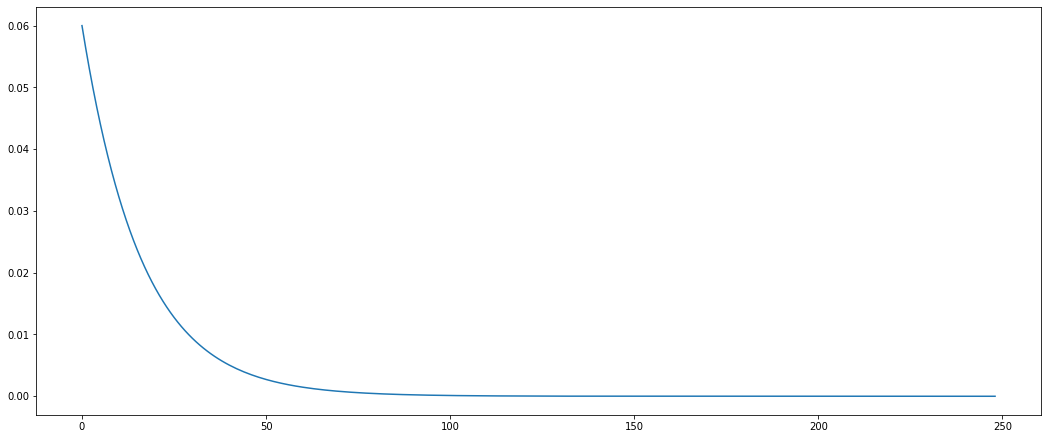

In [87]:
plt.figure(figsize=(18,7.5))
plt.plot(df['delta'],df['peso'])
plt.show()

In [88]:
df['pre_vol'] = df['peso'] * df['u2']
df

,Date,Preco,PD1,LgRet,u2,delta,peso,pre_vol
0,2021-03-08,23.0832595825,NaN,NaN,NaN,248,0.0000000130,NaN
1,2021-03-09,23.3730487823,23.0832595825,0.0124759357,0.0001556490,247,0.0000000138,0.0000000000
2,2021-03-10,24.8819561005,23.3730487823,0.0625592890,0.0039136646,246,0.0000000147,0.0000000001
3,2021-03-11,24.7820281982,24.8819561005,-0.0040241651,0.0000161939,245,0.0000000156,0.0000000000
4,2021-03-12,24.5521945953,24.7820281982,-0.0093174779,0.0000868154,244,0.0000000166,0.0000000000
...,...,...,...,...,...,...,...,...
244,2022-02-25,6.0100002289,6.1199998856,-0.0181372912,0.0003289613,4,0.0468449376,0.0000154102
245,2022-03-02,6.3099999428,6.0100002289,0.0487108809,0.0023727499,3,0.0498350400,0.0001182461
246,2022-03-03,6.3099999428,6.3099999428,0.0000000000,0.0000000000,2,0.0530160000,0.0000000000
247,2022-03-04,6.1799998283,6.3099999428,-0.0208174238,0.0004333651,1,0.0564000000,0.0000244418


In [89]:
vol3 = np.sqrt(df['pre_vol'].sum())
vol3

0.0423048981729693

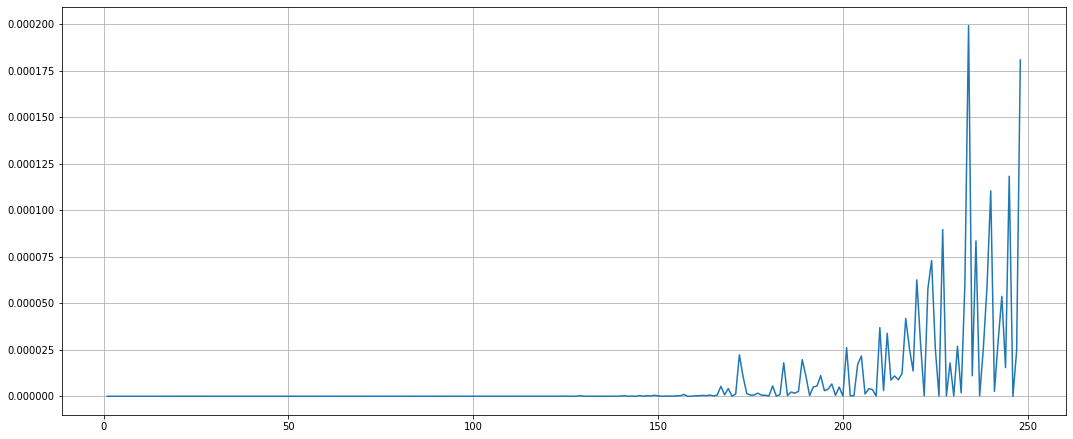

In [90]:
plt.figure(figsize=(18,7.5))
df['pre_vol'].plot()
plt.grid(visible='on')
plt.show()

In [91]:
vol3 * np.sqrt(252)

0.6715694388335252

### Volatilidade Implícita (*IV*)

Sabemos que o valor de um ativo é reflexo do consenso dos participantes com relação ao seu desempenho esperado.
E que podemos considerar até certo ponto que os mercados são eficientes. Então seria possível usar o próprio mercado para 
estimar a volatilidade do ativo?

Vamos lembrar da equação de *Black-Scholes-Merton* (*BSM*) para o preço de uma *call*/*put* europeia.

$$  c = S_0 N(d_1) - K e^{-rT} N(d_2) $$

e 

$$ p = K e^{-rT} N(-d_2) - S_0 N(-d_1) $$

Onde:

$$ d_1 = \frac{ ln(S_0/K) + (r + \sigma^2/2) T }{ \sigma \sqrt T} $$

$$ d_2 = \frac{ ln(S_0/K) + (r - \sigma^2/2) T }{ \sigma \sqrt T} = d_1 - \sigma \sqrt T $$

Em que:

A função *N(x)* é a função de distribuição de probabilidade cumulativa para uma variável com distribuição normal padrão. 

- As variáveis $c$ e $p$ são o preço da opção de compra e da de venda europeias, 
- $S_0$ é o preço da ação no tempo zero, 
- $K$ é o preço de exercício (*strike*), 
- $r$ é a taxa de juros livre de risco com capitalização contínua,
- $\sigma$ é a volatilidade do preço da ação e 
- $T$ é o tempo até a maturidade da opção.

Perceba que os preços das opções dependem de $\sigma$, um valor de volatividade para o ativo objeto.

Ao invés de usar *BSM* para obter o preço da opção, nós podemos usar os preços de mercado de uma opção para estimar a volatilidade que gerou tal preço.

O processo não é simples pois seria difícil isolar $\sigma$ em *BSM*. Mas é possível usar etapas de otimização da função 
*BSM* variando $\sigma$ até obter um valor aproximado da opção e dessa forma, usar retornar o $\sigma$.

In [92]:
r = np.log(1 + 0.1075)
r

0.10210522293715359

In [94]:
#MGLU3

print('taxa livre de risco', round(r,2))
print('preço da ação', 6.33)
print('preço da opção', 0.06)
print('Strike', 6.33)
print('Tempo', round(5/252,2))

taxa livre de risco 0.1
preço da ação 6.33
preço da opção 0.06
Strike 6.33
Tempo 0.02


In [95]:
from   scipy.stats import norm
from   scipy.stats import mvn
import numpy       as     np

class BSM:
    def __init__(self, callput, S, K, r, tau, sigma=0, qrf=None, S_ativo=None):
        self.callput = callput
        self.S = S
        self.K = K
        self.sigma = sigma
        self.r = r
        self.tau = tau
        self.S_ativo = S_ativo
        if qrf is None:
            self.qrf = r
        else:
            self.qrf = qrf
        
    
    def vol_impl_(self):
        if self.S_ativo is None:
            return 0
        else:
            sigma_aux = (np.sqrt(abs(np.log(self.S / self.K) + self.r * self.tau) *\
                         2 / self.tau))
                
            d1_aux = ((np.log(self.S/self.K) +\
                  (self.qrf + sigma_aux**2 / 2) * self.tau) /\
                  (sigma_aux * np.sqrt(self.tau)))
                
            d2_aux = d1_aux - sigma_aux * np.sqrt(self.tau)
            
            if ((self.callput.lower() == 'c') or (self.callput.lower() == 'call')):
                preco_aux = (self.S * np.exp((self.qrf -  self.r) * self.tau) *\
                             norm.cdf(d1_aux) - self.K * np.exp(-self.r * self.tau) *\
                             norm.cdf(d2_aux))
            elif ((self.callput.lower() == 'p') or (self.callput.lower() == 'put')):
                preco_aux = ((self.K * np.exp(-self.r * self.tau) *\
                             norm.cdf(-d2_aux)) - self.S * np.exp((self.qrf -  self.r) *\
                             self.tau) * norm.cdf(-d1_aux))
                                                                  
            vega_aux = (self.S * np.exp((self.qrf - self.r) * self.tau) * norm.pdf(d1_aux) *\
                        np.sqrt(self.tau))
                
            min_diff = abs(self.S_ativo - preco_aux)
            
            eps = 0.0001
            
            while ((abs(self.S_ativo - preco_aux) >= eps) and (abs(self.S_ativo - preco_aux) <= min_diff)):
                sigma_aux = sigma_aux - (preco_aux - self.S_ativo) / vega_aux
                
                d1_aux = ((np.log(self.S/self.K) +\
                          (self.qrf + sigma_aux**2 / 2) * self.tau) /\
                          (sigma_aux * np.sqrt(self.tau)))
                
                d2_aux = d1_aux - sigma_aux * np.sqrt(self.tau)
                
                if ((self.callput.lower() == 'c') or (self.callput.lower() == 'call')):
                    preco_aux = (self.S * np.exp((self.qrf -  self.r) * self.tau) *\
                                 norm.cdf(d1_aux) - self.K * np.exp(-self.r * self.tau) *\
                                 norm.cdf(d2_aux))
                elif ((self.callput.lower() == 'p') or (self.callput.lower() == 'put')):
                    preco_aux = ((self.K * np.exp(-self.r * self.tau) *\
                                  norm.cdf(-d2_aux)) - self.S * np.exp((self.qrf -  self.r) *\
                                  self.tau) * norm.cdf(-d1_aux))
                                                                       
                vega_aux = (self.S * np.exp((self.qrf - self.r) * self.tau) * norm.pdf(d1_aux) *\
                            np.sqrt(self.tau))
                    
                min_diff = abs(self.S_ativo - preco_aux)
                
            if abs(self.S_ativo - preco_aux) <= eps:
                return sigma_aux
            else:
                return 'Não encontrado!'

In [99]:
import numpy as np
from scipy.stats import norm # distribuição normal

def calcula_iv(S, K, r, T, tipo, preco_atual):
    sigmas = np.arange(0.001, 5, 0.001)
    eps = 0.001
    for sigma in sigmas:
        if preco_atual - calc_BS(S, K, r, T, sigma, tipo)<eps:
            return sigma

def calc_BS(S, K, r, T, sigma, tipo):
    # Cálculo do d1
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma*np.sqrt(T)
    # Cálculo do d2
    d2 = d1 - sigma*np.sqrt(T)
    
    if tipo == 'call':
        # Preço se for call (opção de compra)
        price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    elif tipo == 'put':
        # preço se for put (opção de venda)
        price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    else:
        # Não sei o tipo, não calculo
        price = None
    
    return price # Preço/prêmio

In [107]:
option = BSM('call', 34.23, 35.26, r, 9/252, 0, S_ativo=0.70)

In [108]:
option.vol_impl_()

0.41782363731236927

In [100]:
calcula_iv(6.33, 6.33, r, 25/252, 'call', 0.27)

0.301

In [103]:
calc_BS(6.33, 6.33, r, 25/252, 0.651, 'call')

0.542023294759177

In [104]:
calc_BS(6.33, 6.33, r, 25/252, 0.2993338110246239, 'call')

0.2677713965107844